# ITS THE WORST CODE OF MY LIFE. IF YOU KNOW MACHINE LEARNING `DONT EVEN BOTHER SCROLL DOWN` BECAUSE YOU WILL KILL ME.
## ITS BAD BECAUSE I JUST WROTE S*** CODE BECAUSE I WAS BORED.

# About the data
### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# lets check how our target values are i.e. they should be in correct proportion 
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

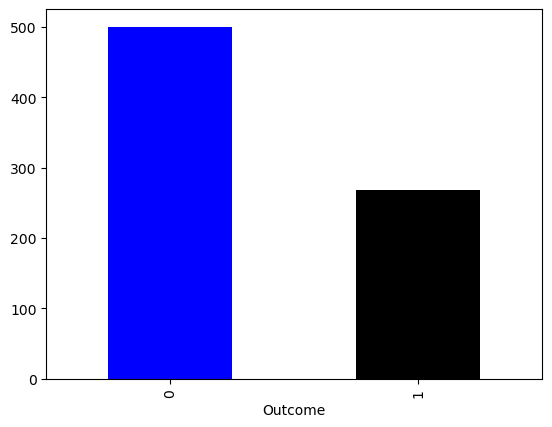

In [14]:
data.Outcome.value_counts().plot(kind = "bar", color=["blue", "black"]);

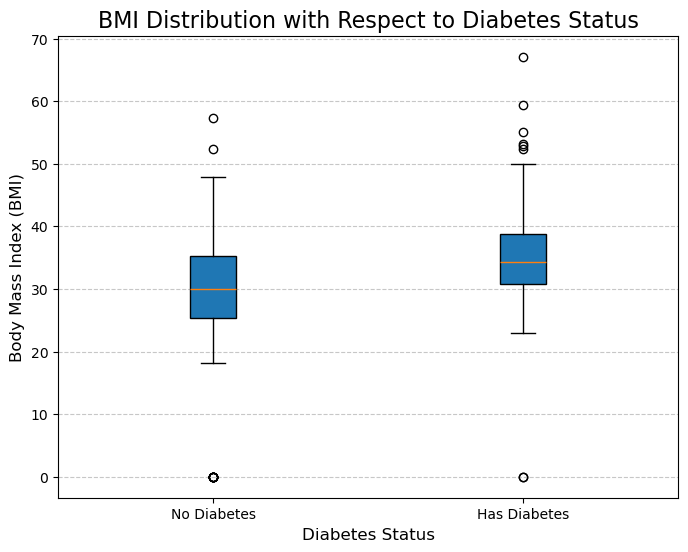

In [20]:
# If your diabetes column uses 1 and 0
bmi_no_diabetes = data[data['Outcome'] == 0]['BMI']
bmi_with_diabetes = data[data['Outcome'] == 1]['BMI']
# Combine the data into a list for the boxplot function
data_to_plot = [bmi_no_diabetes, bmi_with_diabetes]
labels = ['No Diabetes', 'Has Diabetes']

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, patch_artist=True)

# Customize the plot
plt.title('BMI Distribution with Respect to Diabetes Status', fontsize=16)
plt.ylabel('Body Mass Index (BMI)', fontsize=12)
plt.xlabel('Diabetes Status', fontsize=12)
plt.xticks(ticks=[1, 2], labels=labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

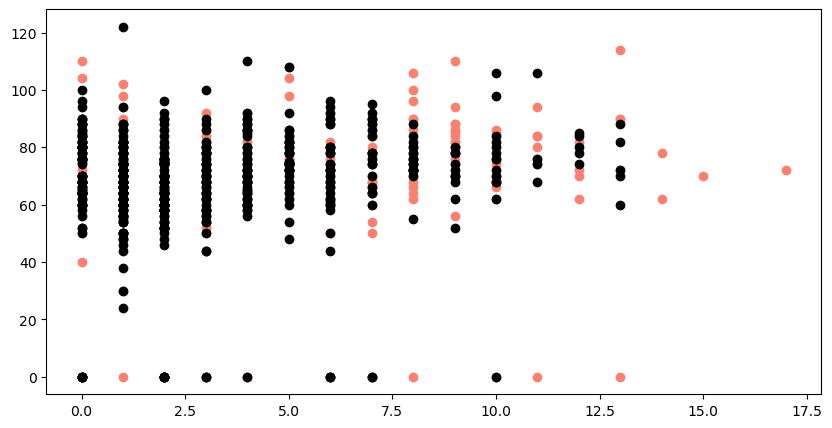

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(data.Pregnancies[data.Outcome==1],
           data.BloodPressure[data.Outcome==1],
           color="salmon")
plt.scatter(data.Pregnancies[data.Outcome==0],
           data.BloodPressure[data.Outcome==0],
           color="black")


In [26]:
#  Lets create corr matrix to visulize all independent varibles in one hit
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [27]:
import seaborn as sns

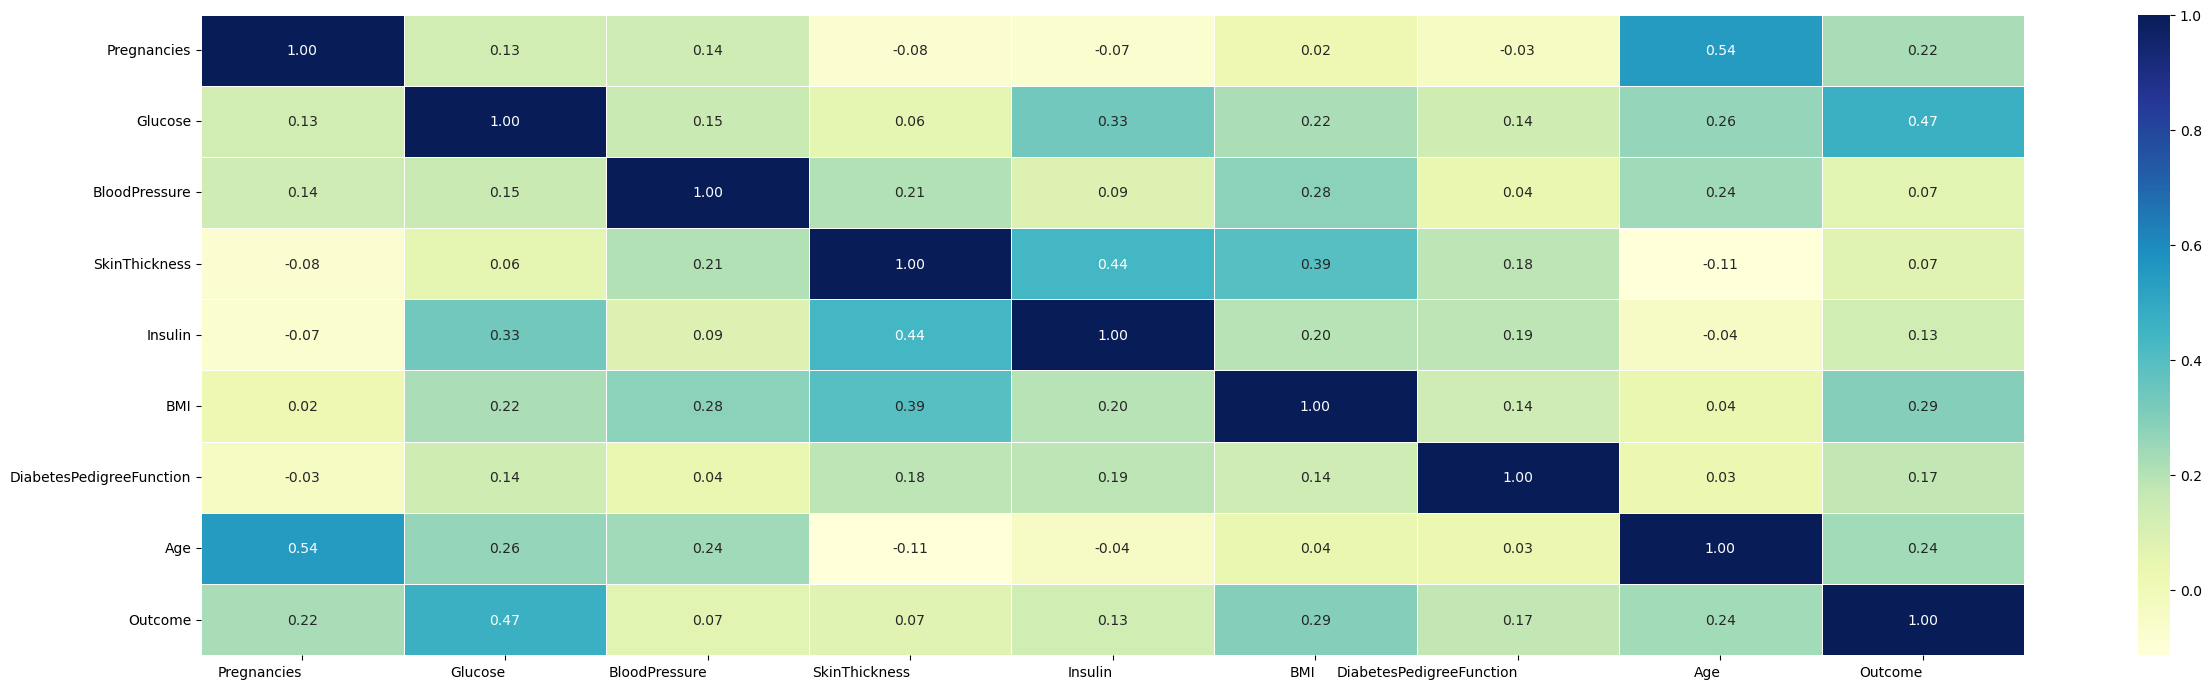

In [46]:
plt.figure(figsize=(25,7))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=0.5, 
            fmt= ".2f",
            cmap="YlGnBu");
plt.xticks(rotation=0 ,ha='right') 
plt.tight_layout()  
plt.plot();

In [4]:
# WE HAVE SEEN ENOUGH OF VISUALISATION NOW LETS CREATE A MODEL FOR THIS 

In [3]:
feature_variable = data.drop("Outcome",axis=1)

In [4]:
target_variable = data["Outcome"].to_numpy()

In [5]:
# lets convert our data into train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# The improved split
x_train, x_test, y_train, y_test = train_test_split(feature_variable,
                                                    target_variable,
                                                    test_size=0.2,
                                                    random_state=42, # For reproducibility
                                                    stratify=target_variable) # For class balance
scaler = StandardScaler()
# 3. Fit the scaler ONLY on the training data
x_train_scaled = scaler.fit_transform(x_train)

# 4. Transform the test data using the scaler that was fit on the training data
x_test_scaled = scaler.transform(x_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:

models = {"knn":KNeighborsClassifier(),
         "RandomForestClassifier":RandomForestClassifier(),
         "LogisticRegression":LogisticRegression(max_iter=1000),
         "SVM":SVC(),
         "Decision tree":DecisionTreeClassifier()}

In [8]:
# lets create a function to fit a model and get score on that model
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(x_train_scaled,y_train)
        model_score[name] = model.score(x_test_scaled,y_test)
    return model_score

In [9]:
model_scores = fit_and_score(models,x_train_scaled,x_test_scaled,y_train,y_test)

In [10]:
model_scores

{'knn': 0.7012987012987013,
 'RandomForestClassifier': 0.7597402597402597,
 'LogisticRegression': 0.7142857142857143,
 'SVM': 0.7532467532467533,
 'Decision tree': 0.7337662337662337}

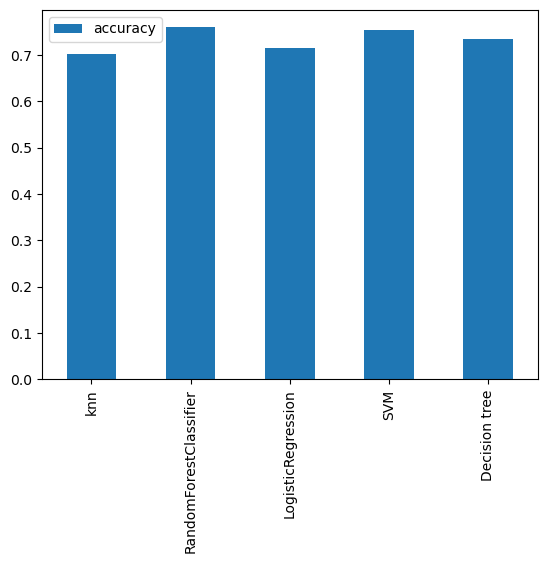

In [11]:
# lets visualise these models performance(accuracy) using graphs
graph = pd.DataFrame(model_scores,index=["accuracy"])
graph.T.plot.bar();

Lovely
as we can see `LogisticRegression` is performing best.

#### Lets tune our models first then we will evaluate them 

In [12]:
# lets start with knn 
train_score = []
test_score = []
knn = KNeighborsClassifier()
n_neighbours = range(1,21)

for i in n_neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    train_score.append(knn.score(x_train_scaled,y_train))
    test_score.append(knn.score(x_test_scaled,y_test))

In [13]:
train_score

[1.0,
 0.8436482084690554,
 0.8631921824104235,
 0.8110749185667753,
 0.8061889250814332,
 0.8045602605863192,
 0.8061889250814332,
 0.8127035830618893,
 0.8013029315960912,
 0.7915309446254072,
 0.7947882736156352,
 0.7768729641693811,
 0.7768729641693811,
 0.7931596091205212,
 0.7915309446254072,
 0.7866449511400652,
 0.7833876221498371,
 0.7785016286644951,
 0.7752442996742671,
 0.7752442996742671]

Maximum KNN score on the test data: 77.27%
Maximum KNN score on the train data: 100.00%


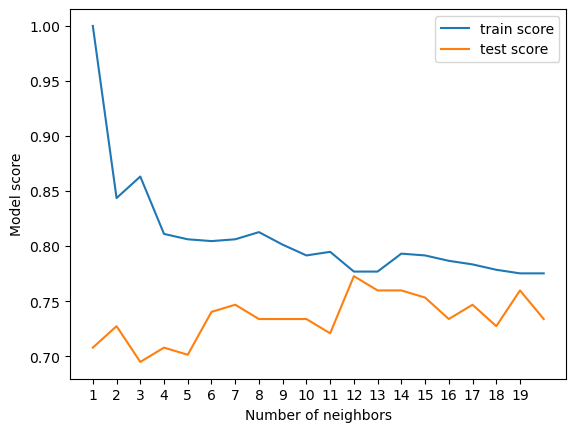

In [14]:
plt.plot(n_neighbours,train_score, label= "train score")
plt.plot(n_neighbours,test_score, label= "test score")
plt.xticks(np.arange(1,20,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")
print(f"Maximum KNN score on the train data: {max(train_score)*100:.2f}%")

In [15]:
# lets go
from scipy.stats import randint
# 1) RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# 2)Linear Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# 3) Decision tree
dt_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}
# 4) SVM
svc_grid ={
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.001],  # Only for 'rbf'
    'kernel': ['rbf']  # Drop 'linear' to avoid gamma confusion
}

In [16]:
from sklearn.model_selection import RandomizedSearchCV
# lets start tuning all the model one by one

In [17]:
%%time 

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train_scaled, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1min 26s
Wall time: 1min 28s


In [18]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [20]:
rs_rf.score(x_test_scaled,y_test)

0.7337662337662337

In [21]:
%%time
# 2) LOGISTIC REGRESION
np.random.seed(42)
lr_rf = RandomizedSearchCV(LogisticRegression(),
                          param_distributions=log_reg_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
lr_rf.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 375 ms
Wall time: 391 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
lr_rf.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [23]:
lr_rf.score(x_test_scaled,y_test)

0.7077922077922078

In [24]:
# svc
svm_rf = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=svc_grid,
    n_iter=6,  # Reduced iterations
    cv=3,  # Faster cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

svm_rf.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=6, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.01, 0.001],
                                        'kernel': ['rbf']},
                   random_state=42, verbose=1)

In [25]:
svm_rf.score(x_test_scaled,y_test)

0.7532467532467533

In [26]:
svm_rf.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [29]:
# lets do it for decision tree classifier  

In [27]:
dt_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=dt_grid,
    n_iter=10,            # Small number of combinations
    cv=3,                 # Faster CV
    n_jobs=-1,            # Parallel processing
    verbose=2,
    random_state=42
)

dt_search.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15]},
                   random_state=42, verbose=2)

In [29]:
dt_search.score(x_test_scaled,y_test)

0.7012987012987013

In [30]:
dt_search.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy'}

In [31]:
# Lets use gridsearchcv to tune our model again.
from sklearn.model_selection import GridSearchCV


In [32]:
# as we can see RandomForestClassifier performed best among others but still we will take LinearRgression also for grid search cv.
rf_grid = {'n_estimators': [610],
 'min_samples_split': [18],
 'min_samples_leaf': [1],
 'max_depth': [5]}
# 2)Linear Regression
log_reg_grid = {'solver': ["liblinear"], 'C': [11.288378916846883]}

In [33]:
rf_gs = GridSearchCV(RandomForestClassifier(),
                    param_grid= rf_grid,
                    cv=5,
                    verbose= True)
rf_gs.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'min_samples_leaf': [1],
                         'min_samples_split': [18], 'n_estimators': [610]},
             verbose=True)

In [34]:
rf_gs.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 610}

In [35]:
rf_gs.score(x_test_scaled,y_test)

0.7272727272727273

In [35]:
# lets do gridsearchcv for linear regression

In [36]:
lg_gs = GridSearchCV(LogisticRegression(),
                    param_grid = log_reg_grid,
                    cv = 5,
                    verbose = True)
lg_gs.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [11.288378916846883], 'solver': ['liblinear']},
             verbose=True)

In [37]:
lg_gs.score(x_test_scaled,y_test)

0.7142857142857143

### Evaluating our model on the basis of precision , f1 score , recall

ROC CURVE

In [38]:
rf_y_preds = rf_gs.predict(x_test_scaled)

In [39]:
rf_y_preds

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

lets build a ROC curve

In [40]:
from sklearn.metrics import RocCurveDisplay

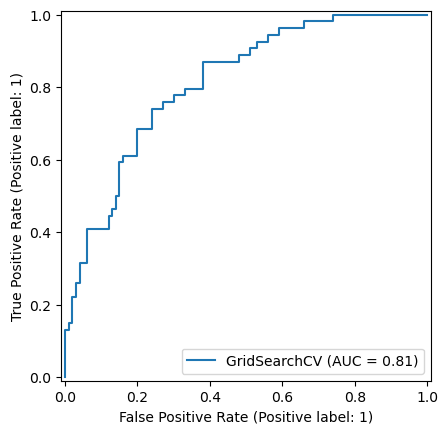

In [41]:
RocCurveDisplay.from_estimator(estimator=rf_gs,
                              X = x_test_scaled,
                              y = y_test);

CONFUSION MATRIX 

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rf_y_preds))

[[85 15]
 [27 27]]


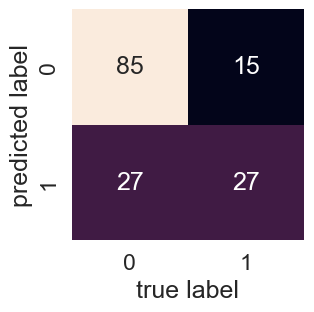

In [43]:
import seaborn as sns
sns.set(font_scale=1.5)
def plot_conf(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf(y_test, rf_y_preds)

Classification Report

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



CrossVal score 

lets see accuracy,precision,recall, f1 score on crossvalscore

In [48]:
rf_clf = RandomForestClassifier(max_depth = 5,
 min_samples_leaf = 1,
 min_samples_split = 18,
 n_estimators = 610)

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
rf_clf_cv = cross_val_score(rf_clf,
                           feature_variable,
                           target_variable,
                           cv = 5,
                           scoring="precision")
rf_clf_cv

array([0.71428571, 0.63043478, 0.71428571, 0.8       , 0.7027027 ])

In [51]:
precision = np.mean(rf_clf_cv)

In [52]:
rf_clf_cv_recall = cross_val_score(rf_clf,
                           x_test_scaled,
                           y_test,
                           cv = 5,
                           scoring="recall")
rf_clf_cv_recall

array([0.45454545, 0.45454545, 0.72727273, 0.72727273, 0.4       ])

In [53]:
recall = np.mean(rf_clf_cv_recall)

In [54]:
rf_clf_f1 = cross_val_score(rf_clf,
                           x_test_scaled,
                           y_test,
                           cv = 5,
                           scoring="f1")


In [55]:
f1 = np.mean(rf_clf_f1)

In [56]:
f1

0.5772256728778468

In [57]:
accuracy = cross_val_score(rf_clf,
                           x_test_scaled,
                           y_test,
                          cv = 5,
                          scoring= "accuracy")


In [58]:
accuracy_np = np.mean(accuracy)

In [59]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":accuracy ,
                            "Precision": rf_clf_cv,
                            "Recall": rf_clf_cv_recall,
                            "F1": rf_clf_f1 },
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

ValueError: Length of values (5) does not match length of index (1)

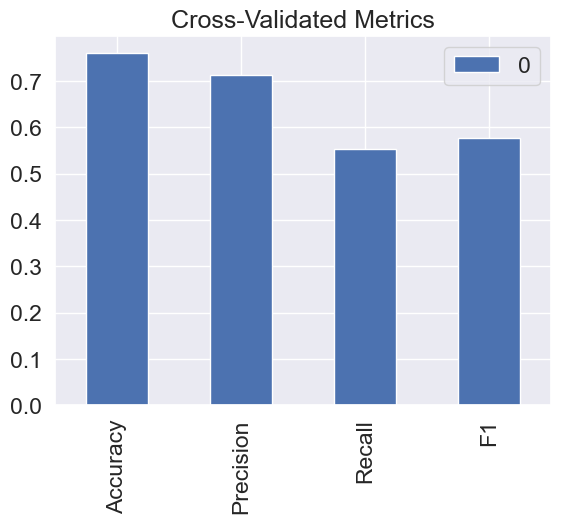

In [61]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":accuracy_np ,
                            "Precision": precision,
                            "Recall": recall,
                            "F1": f1 },
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend= True);

lets do all this for linear regression also 

In [63]:
lr_y_preds = lg_gs.predict(x_test_scaled)

ROC curve

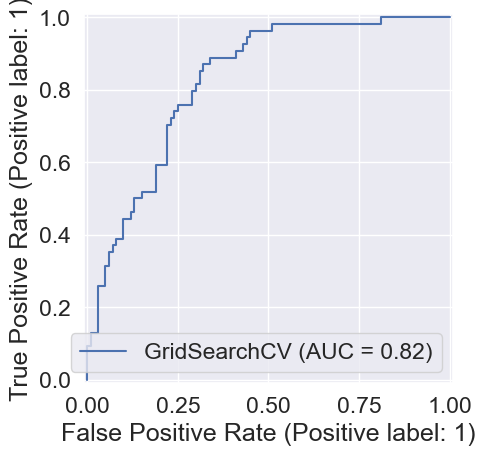

In [64]:
RocCurveDisplay.from_estimator(estimator = lg_gs,
                              X=x_test_scaled,
                              y = y_test);

CONFUSION MATRIX

In [65]:
print(confusion_matrix(y_test,lr_y_preds))

[[82 18]
 [26 28]]


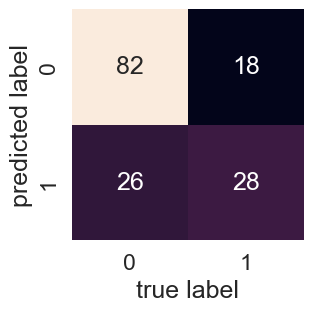

In [66]:
plot_conf(y_test, lr_y_preds)

CLASSIFICATION REPORT 

In [67]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



Lets use cross val score 

In [68]:
clf2=LogisticRegression(C=11.288378916846883, solver='liblinear')

In [70]:
lr_acc = cross_val_score(clf2,
                        x_test_scaled,
                           y_test,
                        cv = 5,
                        scoring="accuracy")


In [71]:
lr_acc

array([0.64516129, 0.67741935, 0.80645161, 0.64516129, 0.83333333])

In [87]:
mean_acc = np.mean(lr_acc)

In [88]:
lr_pre = cross_val_score(clf2,
                        feature_variable,
                        target_variable,
                        cv = 5,
                        scoring="precision")
mean_pre = np.mean(lr_pre)

In [89]:
lr_f1 = cross_val_score(clf2,
                        feature_variable,
                        target_variable,
                        cv = 5,
                        scoring="f1")
mean_f1 = np.mean(lr_f1)

In [90]:
lr_recall = cross_val_score(clf2,
                        feature_variable,
                        target_variable,
                        cv = 5,
                        scoring="recall")
mean_recall = np.mean(lr_recall)

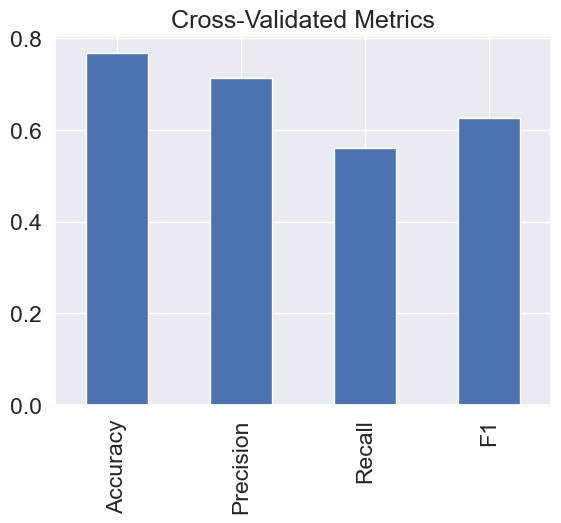

In [92]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": mean_acc,
                            "Precision": mean_pre,
                            "Recall": mean_recall,
                            "F1": mean_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);